In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Conv2D,UpSampling2D,Input,MaxPooling2D,BatchNormalization,Flatten,Activation,Dropout
from keras.models import Sequential,Model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.datasets import mnist
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
xtrain=xtrain.astype('float32')/255
xtrain=np.expand_dims(xtrain,axis=3)
xtrain.shape

(60000, 28, 28, 1)

In [5]:
xtest=xtest.astype('float32')/255
xtest=np.expand_dims(xtest,axis=3)
xtest.shape

(10000, 28, 28, 1)

In [6]:
input_img=Input(shape=(28,28,1))
x=Conv2D(16,(3,3),padding='same')(input_img)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
Encoded=MaxPooling2D((2,2),padding='same')(x)

In [7]:
x=Conv2D(8,(3,3),padding='same')(Encoded)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(8,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),padding='valid')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [8]:
model=Model(input_img,decoded)

In [9]:
model.summary()
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 8)         32        
__________

In [10]:
model.fit(xtrain,xtrain,epochs=30,batch_size=128,shuffle=True,validation_data=(xtest,xtest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.1838 - acc: 0.7959 - val_loss: 0.1408 - val_acc: 0.7986
Epoch 2/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.1217 - acc: 0.8087 - val_loss: 0.1224 - val_acc: 0.8038
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1103 - acc: 0.8106 - val_loss: 0.1064 - val_acc: 0.8097
Epoch 4/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1053 - acc: 0.8114 - val_loss: 0.1024 - val_acc: 0.8109
Epoch 5/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1022 - acc: 0.8119 - val_loss: 0.1053 - val_acc: 0.8084
Epoch 6/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1000 - acc: 0.8123 - val_loss: 0.0976 - val_acc: 0.8115
Epoch 7/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.0983 - acc: 0.8125 - val_loss: 0.0965 -

In [12]:
import matplotlib.pyplot as plt

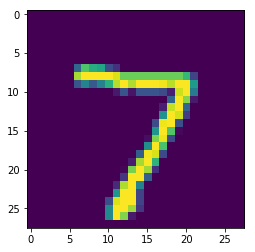

In [14]:
plt.imshow(xtest[0].reshape((28,28)))

In [18]:
mnist_test=model.predict(xtest)

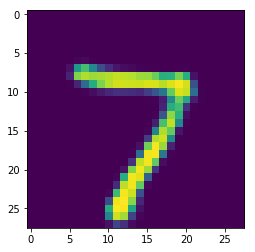

In [21]:
plt.imshow(mnist_test[0].reshape((28,28)))

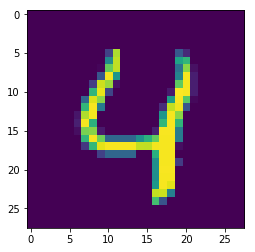

In [23]:
plt.imshow(xtest[4].reshape((28,28)))
    

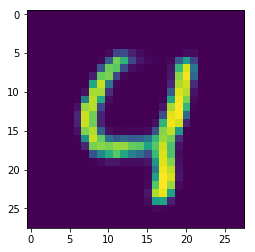

In [24]:
plt.imshow(mnist_test[4].reshape((28,28)))